# Instacart Grocery Basket Analysis: Part 2  

# Table of Contents
## Importing Libraries & Dataset
#### Importing Libraries
#### Importing Data
## Customer Profiling
### Customer Profile Based on Age
#### Creation of 3 different age categories
#### Bar Chart to display Age categories
#### Plotting a graph to display spending habits by age
#### Relationship between age category & expenditure
#### Graph between Price statistics & age categories
#### Crosstab between age category & day of the week
#### Graph to display the relationship between the age category & day of the week
#### Crosstab & graph to display Orders during a day by age categories
#### Relationship between age category & order frequency
#### Graph between Order Frequency statistics & age categories
### Customer Profile By Income
#### Creation of a new column income_flag to display different income groups
#### Creation of a sample
#### Graph to display the percentage Share of Different Income Groups
#### Crosstab between income_flag & price_range
#### Graph to display the relationship between price-range and income groups
#### Crosstab between income flag and order frequency flag
#### Graph to display the relationship between income and order frequency
#### Relationship between income flag & order frequency
### Customer Profile by Gender, Number of Dependants & Marital Status
#### Frequency checks for gender,  number of dependants & marital status
#### Graph to display Customer split by Marital Status
#### Crosstab & graph to display Orders during days of week by Marital Status
#### Crosstab & graph to display Orders during a day by Marital Status
#### Relationship between marital status & expenditure
#### Graph between Price statistics & Marital Status
#### Relationship between marital status & order frequency
#### Graph between Order Frequency statistics & MArital Status
## Departments
#### Importing dataset
#### Creation of data dictionary
#### Creation of new column ‘department’ in the main dataframe
#### Graph to display the distribution of different departments
#### Crosstab & Heatmap between department & age category
#### Crosstab & Heatmap between department & marital status
#### Crosstab & Heatmap between departments & regions
#### Creation of a new column ‘customer_profile’
#### Exporting the latest datframe
#### Importing the latest dataframe
#### Graph to display Customer Share By Customer Profile
#### Relationship and graph between customer profile & expenditure
#### Relationship and graph between customer profile & order frequency
#### Crosstab & Heatmap between customer profile & department
### Loyalty
#### Relationship between Loyalty categories & Expenditure
#### Relationship between Loyalty categories & Order Frequency
#### Boxplot to display the relationship between loyalty & order frequency
### Price-Range
#### Creation of a chart to display the distribution of different price ranges

# Importing libraries & dataset

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import os
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# importing data

path = '/Users/tannu/Desktop/Data Analytics/Instacart Basket Analysis Dec-2025 '
df = pd.read_parquet(os.path.join(path, '2 Data', 'Prepared Data', 'cust_ords_prods_high_activity.parquet'))

In [4]:
# checking the dataframe

df.head()

,user_id,gender,state,age,date_joined,number_of_dependants,marital_status,income,product_id,product_name,...,busiest_hours,max_order,loyalty_flag,average_spent,spending_flag,order_frequency,order_frequency_flag,_merge,region,activity_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Most Orders,8,New Customer,7.988889,Low Spender,19.0,Regular Customer,both,Midwest,High activity
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Most Orders,8,New Customer,7.988889,Low Spender,19.0,Regular Customer,both,Midwest,High activity
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Most Orders,8,New Customer,7.988889,Low Spender,19.0,Regular Customer,both,Midwest,High activity
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Most Orders,8,New Customer,7.988889,Low Spender,19.0,Regular Customer,both,Midwest,High activity
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Most Orders,8,New Customer,7.988889,Low Spender,19.0,Regular Customer,both,Midwest,High activity


In [5]:
df.shape

(30964564, 31)

# Customer Profiling

## Customer Profile based on Age

In [6]:
df['age'].value_counts(dropna = False)

age
79    508337
49    507879
48    506730
31    506218
64    504832
       ...  
60    461897
36    460649
66    454604
41    451269
25    449324
Name: count, Length: 64, dtype: int64

In [7]:
df['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

#### The maximum and minimum ages of customers in instacart databse is 81 & 18, respectively. The average age is 49. 
#### Based on the percentiles, we can split the age into 3 categories, <= 33 (Young Adults), > 33 & <= 65 (Middle-Aged) and > 65 (Senior)   

In [3]:
# creating a new column to display the age categories

df.loc[df['age'] <= 33, 'age_category'] = 'Young Adults'
df.loc[(df['age'] > 33) & (df['age'] <= 65), 'age_category'] = 'Middle-Aged'
df.loc[df['age'] > 65, 'age_category'] = 'Senior'

In [9]:
df.shape

(30964564, 32)

In [10]:
df['age_category'].value_counts(dropna = False)

age_category
Middle-Aged     15476265
Young Adults     7757465
Senior           7730834
Name: count, dtype: int64

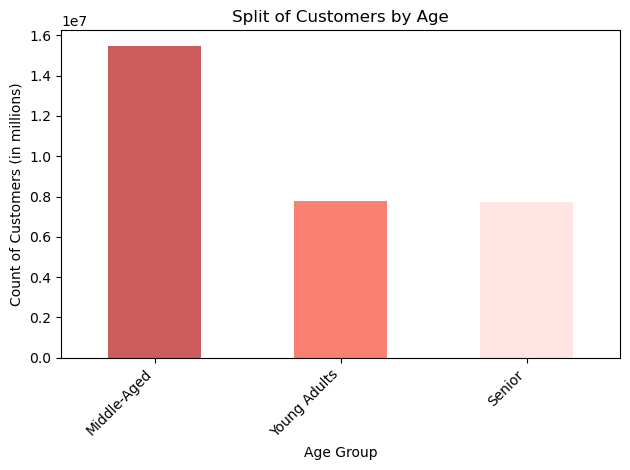

In [71]:
# plotting a graph to display different age categories

age_category = df['age_category'].value_counts().plot.bar(color = ['indianred', 'salmon', 'mistyrose'])
plt.xlabel('Age Group')
plt.ylabel('Count of Customers (in millions)')
plt.title('Split of Customers by Age')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [72]:
# exporting this graph

age_category.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'split_by_age.png'))

#### The maximum number of customers is middle-aged on the Instacart app, while young adults and seniors are not far apart.

In [11]:
# Creating a crosstab between age_category & spending_flag

crosstab = pd.crosstab(df['age_category'], df['spending_flag'], dropna = False)

In [12]:
# copying the above created crosstab to clipboard

crosstab.to_clipboard()

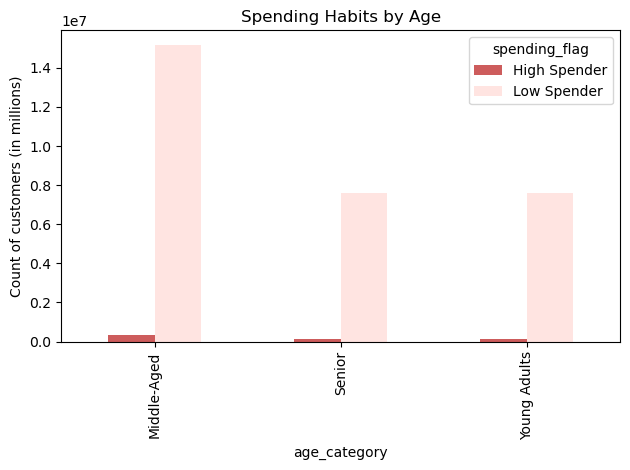

In [13]:
# plotting a bar graph from the above crosstab

bar = crosstab.plot(kind='bar',color=['indianred', 'mistyrose'])
plt.xlabel("age_category")
plt.ylabel("Count of customers (in millions)")
plt.title("Spending Habits by Age")
plt.tight_layout()

In [14]:
# exporting the above graph 

bar.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'spending_by_age.png'))

In [8]:
# Aggregating the max, mean, and min variables for the age categories 
 
df_agg = df.groupby('age_category').agg({'prices': ['min', 'max', 'mean']})
df_agg

prices                
                min   max      mean
age_category                       
Middle-Aged     1.0  25.0  7.791733
Senior          1.0  25.0  7.794342
Young Adults    1.0  25.0  7.784572

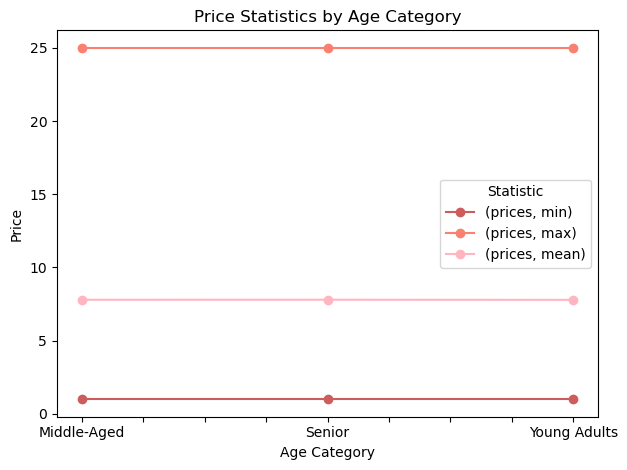

In [14]:
# plotting a line graph to display the above results

age_category_price = df_agg.plot(marker='o', color = ['indianred', 'salmon', 'lightpink'])
plt.title('Price Statistics by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Price')
plt.legend(title='Statistic')
plt.tight_layout()

#### Age does not appear to affect spending trends based on the above analysis.

In [15]:
# exporting the line graph

age_category_price.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'age_price.png'))

In [36]:
# Examining the relationship between age_category & orders_day_of_the_week

crosstab1 = pd.crosstab(df['orders_day_of_the_week'], df['age_category'], dropna = False)

In [20]:
# displaying crosstab1

crosstab1

age_category,Middle-Aged,Senior,Young Adults
orders_day_of_the_week,,,
0,2947757,1477029,1483824
1,2703852,1336438,1371396
2,2017901,1004597,1002208
3,1835346,921129,913060
4,1815574,899851,909569
5,2013585,1008597,1011547
6,2142250,1083193,1065861


In [43]:
crosstab1.to_clipboard()

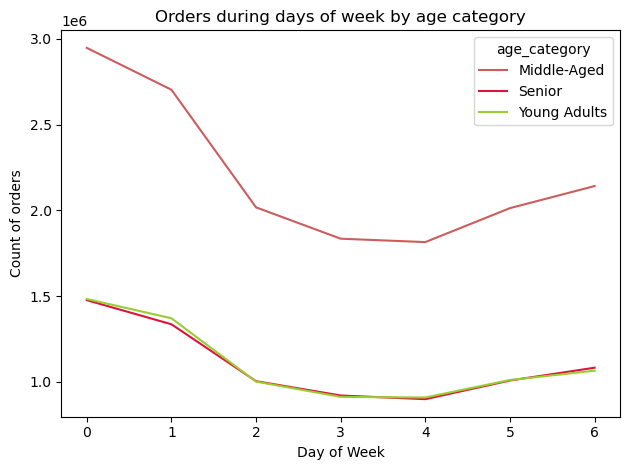

In [41]:
# plotting a bar graph for the above crosstab

bar_age_dow = crosstab1.plot(kind='line',color=['indianred', 'crimson', 'yellowgreen'])
plt.xlabel("Day of Week")
plt.ylabel("Count of orders")
plt.title("Orders during days of week by age category")
plt.tight_layout()

#### Age groups do not affect the days of the week either. All age groups follow the same trend, i.e. maximum number of orders during the weekend.

In [42]:
# exporting the bar graph

bar_age_dow.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'line_age_dow.png'))

In [41]:
# Examining the relationship between age_category & orders_hour_of_day

crosstab_age_hour = pd.crosstab(df['order_hour_of_day'], df['age_category'], dropna = False)
crosstab_age_hour

age_category,Middle-Aged,Senior,Young Adults
order_hour_of_day,,,
0,104317,50106,53619
1,54893,26826,27902
2,31916,16554,17221
3,23652,12600,12544
4,24884,12928,12951
5,41530,21819,21069
6,138179,70322,72512
7,428162,220145,214906
8,830951,416244,411915


In [42]:
crosstab_age_hour.to_clipboard()

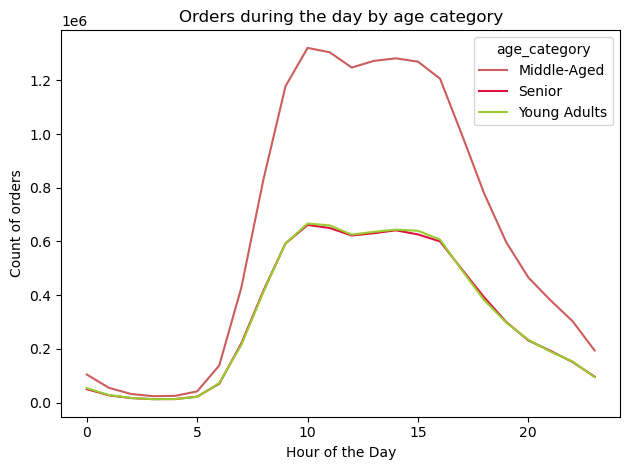

In [43]:
# plotting a bar graph for the above crosstab

line_age_hour = crosstab_age_hour.plot(kind='line',color=['indianred', 'crimson', 'yellowgreen'])
plt.xlabel("Hour of the Day")
plt.ylabel("Count of orders")
plt.title("Orders during the day by age category")
plt.tight_layout()

#### There is no difference in shopping trends during the day for different age groups. All groups shop most between 10 am - 4 pm.

In [44]:
# exporting the graph

line_age_hour.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'age_hour.png'))

In [13]:
# Aggregating the max, mean, and min variables for the age categories 
 
df_order_agg = df.groupby('age_category').agg({'order_frequency': ['min', 'max', 'mean']})
df_order_agg

order_frequency                
                         min   max      mean
age_category                                
Middle-Aged              0.0  30.0  9.958121
Senior                   0.0  30.0  9.937782
Young Adults             0.0  30.0  9.974473

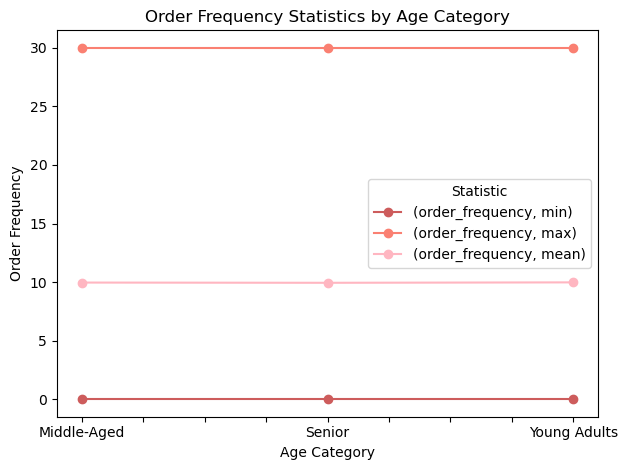

In [16]:
# plotting a line graph to display the above results

age_ord_frequency = df_order_agg.plot(marker='o', color = ['indianred', 'salmon', 'lightpink'])
plt.title('Order Frequency Statistics by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Order Frequency')
plt.legend(title='Statistic')
plt.tight_layout()

#### There is no distinction of order frequency among different age groups.

In [17]:
# exporting the above line graph

age_ord_frequency.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'age_frequency.png'))

## Customer Profile by Income

In [15]:
# understanding the values in the column 'income'

df['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

#### The average salary is approximately $99,700. The minimum & maximum salaries are around 25k and 594k. Let's create 3 categories based on the percentiles < 67k (Low-Earner), >= 67k & < 128k (Average-Earner) and >= 128k (High-Earner).

In [12]:
# creating a new column 'income_flag'

df.loc[df['income'] < 67000, 'income_flag'] = 'Low-Earner'
df.loc[(df['income'] >= 67000) & (df['income'] < 128000), 'income_flag'] = 'Average-Earner'
df.loc[df['income'] >= 128000, 'income_flag'] = 'High-Earner'

In [11]:
# checking the column frequency for 'income_flag'

df['income_flag'].value_counts(dropna = False)

income_flag
Average-Earner    15549969
High-Earner        7753117
Low-Earner         7661478
Name: count, dtype: int64

In [18]:
df.shape

(30964564, 33)

Text(0.5, 1.0, 'Percentage Share of Different Income Groups')

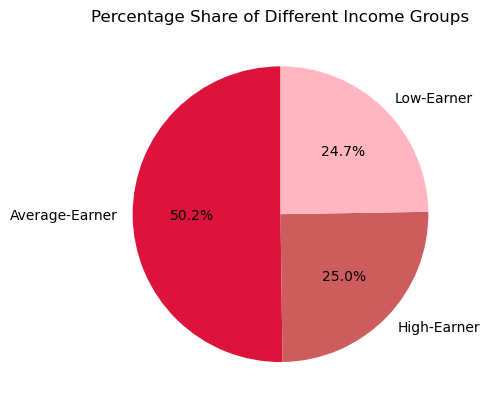

In [6]:
# plotting a graph to display the income groups

income_group = df['income_flag'].value_counts().plot.pie(autopct='%1.1f%%',startangle=90, colors = ['crimson', 'indianred', 
                                                                                                    'lightpink'])
plt.ylabel('')
plt.title('Percentage Share of Different Income Groups')

In [7]:
# exporting the graph

income_group.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'income_groups.png'))

In [19]:
# creating a sample for faster computation 

np.random.seed(4)
dev = np.random.rand(len(df))<= 0.7

In [20]:
# checking if the object dev is created

dev

array([False,  True, False, ...,  True,  True,  True], shape=(30964564,))

In [21]:
# Assigning 70% of the dataset to object 'big' and 30% of the dataset to object 'small'. We'll be using 'small' to compute the required function for our analysis.

big = df[dev]
small = df[~dev]

In [22]:
small.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'marital_status', 'income', 'product_id',
       'product_name', 'department_id', 'prices', 'order_id', 'order_number',
       'orders_day_of_the_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', 'price_range', 'busiest_day',
       'busiest_hours', 'max_order', 'loyalty_flag', 'average_spent',
       'spending_flag', 'order_frequency', 'order_frequency_flag', '_merge',
       'region', 'activity_flag', 'income_flag', 'age_category'],
      dtype='object')

In [24]:
# accessing only relevant columns

small[['income', 'price_range', 'loyalty_flag', 'average_spent',
       'spending_flag', 'order_frequency', 'order_frequency_flag', 
       'region', 'activity_flag', 'income_flag', 'age_category']] .head()

,income,price_range,loyalty_flag,average_spent,spending_flag,order_frequency,order_frequency_flag,region,activity_flag,income_flag,age_category
0,165665,Mid-range product,New Customer,7.988889,Low Spender,19.0,Regular Customer,Midwest,High activity,High-Earner,Middle-Aged
2,165665,Mid-range product,New Customer,7.988889,Low Spender,19.0,Regular Customer,Midwest,High activity,High-Earner,Middle-Aged
3,165665,Low-range product,New Customer,7.988889,Low Spender,19.0,Regular Customer,Midwest,High activity,High-Earner,Middle-Aged
6,165665,Low-range product,New Customer,7.988889,Low Spender,19.0,Regular Customer,Midwest,High activity,High-Earner,Middle-Aged
10,165665,Low-range product,New Customer,7.988889,Low Spender,19.0,Regular Customer,Midwest,High activity,High-Earner,Middle-Aged


In [25]:
# creating a crosstab between income_flag & price_range

crosstab2 = pd.crosstab(small['price_range'], small['income_flag'], dropna = False)
crosstab2

income_flag,Average-Earner,High-Earner,Low-Earner
price_range,,,
High-range product,64154,33493,21157
Low-range product,1384826,692014,824537
Mid-range product,3215904,1599336,1453047


In [26]:
crosstab2.to_clipboard()

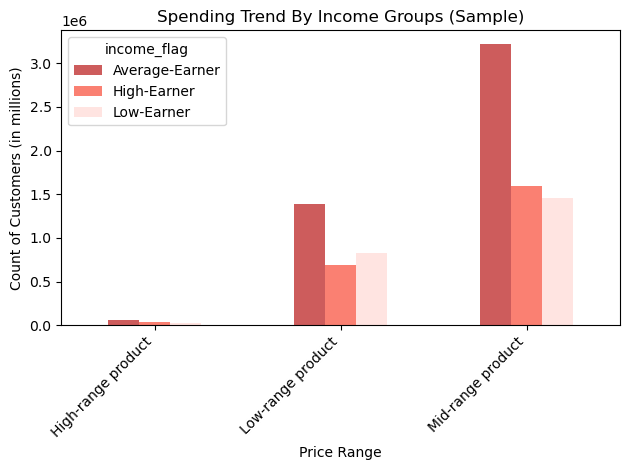

In [33]:
# plotting a bar graph to visualize the crosstab result

bar_price_earner = crosstab2.plot(kind = 'bar', color = ['indianred', 'salmon', 'mistyrose'])
plt.xlabel('Price Range')
plt.ylabel('Count of Customers (in millions)')
plt.title('Spending Trend By Income Groups (Sample)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#### The above visualization depicts that high earners do not necessarily spend more on high-range products. In fact, average earners are spending more on all categories. 

In [34]:
# exporting the above graph

bar_price_earner.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'spending_by_income.png'))

In [45]:
# creating a crosstab between income_flag and order_frequency_flag

crosstab3 = pd.crosstab(small['order_frequency_flag'], small['income_flag'], dropna = False)
crosstab3

income_flag,Average-Earner,High-Earner,Low-Earner
order_frequency_flag,,,
Frequent Customer,3210220,1601416,1550130
Non-frequent Customer,421421,210046,234850
Regular Customer,1033243,513381,513761


In [46]:
crosstab3.to_clipboard()

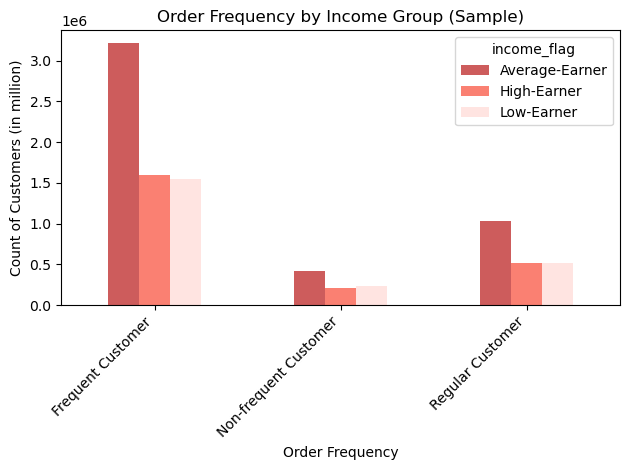

In [51]:
# plotting a graph through crosstab3

bar_income_order_frequency = crosstab3.plot(kind = 'bar', color = ['indianred', 'salmon', 'mistyrose'])
plt.xlabel('Order Frequency')
plt.ylabel('Count of Customers (in million)')                                            
plt.title('Order Frequency by Income Group (Sample)')                                           
plt.xticks(rotation=45, ha='right')                                           
plt.tight_layout()                                          

#### There is no effect of income on the frequency of the orders from the above graph. Average earners are dominating all fields. 

In [81]:
# Aggregating the max, mean, and min variables for the income categories 
 
df.groupby('income_flag').agg({'order_frequency': ['min', 'max', 'mean']})

order_frequency                 
                           min   max       mean
income_flag                                    
Average-Earner             0.0  30.0   9.880912
High-Earner                0.0  30.0   9.869282
Low-Earner                 0.0  30.0  10.200764

#### Order frequency for all income groups have same minimum & maximum and a similar mean. 

## Customer Profile by Gender, Number of Dependants & Marital Status

In [54]:
# checking for frequency of Gender

small['gender'].value_counts(dropna = False)

gender
Male      4676199
Female    4612269
Name: count, dtype: int64

#### Gender does not play a role as the user count is quite similar for both genders.

In [55]:
# checking for frequency of Number of Dependants

small['number_of_dependants'].value_counts(dropna = False)

number_of_dependants
3    2333198
0    2321137
2    2320228
1    2313905
Name: count, dtype: int64

#### Number of dependants also does not seem to affect the customer count of Instacart.

In [56]:
# checking for frequency of Marital Status

small['marital_status'].value_counts(dropna = False)

marital_status
married                             6522753
single                              1527957
divorced/widowed                     793180
living with parents and siblings     444578
Name: count, dtype: int64

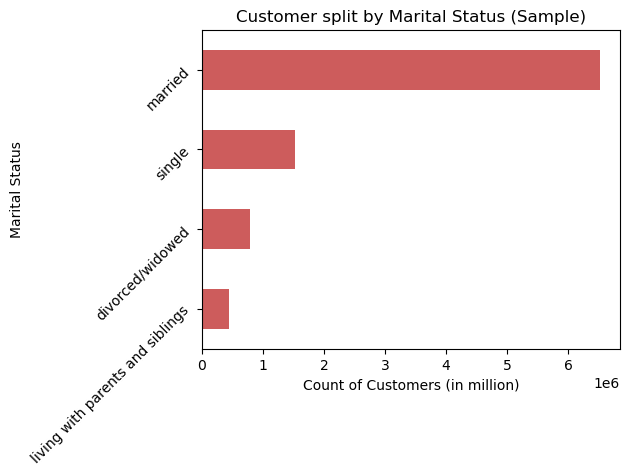

In [74]:
# plotting a graph to visualize if the marital status of users affects the usage of instacart app

marital_status = small['marital_status'].value_counts().sort_values().plot.barh(color = 'indianred')
plt.xlabel('Count of Customers (in million)')
plt.ylabel('Marital Status')
plt.title('Customer split by Marital Status (Sample)')
plt.yticks(rotation = 45)
plt.tight_layout()

In [75]:
# exporting this graph

marital_status.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'marital_status.png'))

#### Instacart has the largest number of married people in its customer base. The Instacart marketing team should target other groups, too, to increase their customer base.

In [32]:
# Examining the relationship between marital_status & orders_day_of_the_week

crosstab_fam_dow = pd.crosstab(df['orders_day_of_the_week'], df['marital_status'], dropna = False)
crosstab_fam_dow

marital_status,divorced/widowed,living with parents and siblings,married,single
orders_day_of_the_week,,,,
0,502506,280828,4150704,974572
1,459198,259482,3789854,903152
2,343839,192366,2829759,658742
3,315320,174418,2578075,601722
4,306704,173214,2546521,598555
5,348434,195460,2824095,665740
6,369270,205404,3024703,691927


In [46]:
crosstab_fam_dow.to_clipboard()

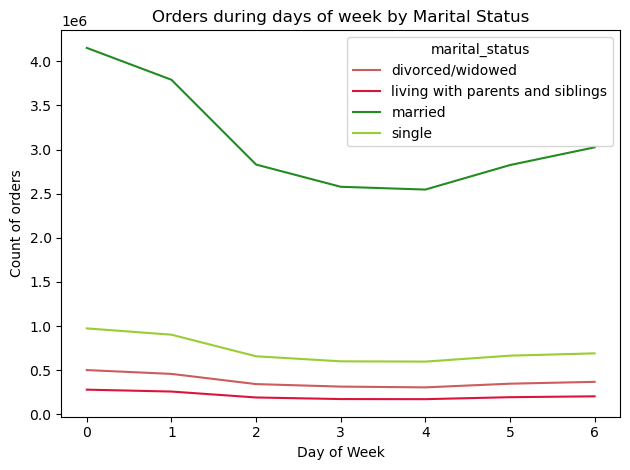

In [33]:
# plotting a graph to display the results of the above crosstab

line_fam_dow = crosstab_fam_dow.plot(kind='line',color=['indianred', 'crimson', 'forestgreen', 'yellowgreen'])
plt.xlabel("Day of Week")
plt.ylabel("Count of orders")
plt.title("Orders during days of week by Marital Status")
plt.tight_layout()

#### Married people order substantially more than all other categories, but they also order differently from other groups. Married people tend to order more on the weekends and single people also order slightly more on weekends, but overall, for single, divorced/widowed and living with parents and siblings there isn't a clear shopping trend. 

In [34]:
# exporting the graph

line_fam_dow.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'fam_dow.png'))

In [35]:
# creating a crosstab between order_hour_of_day and marital_status

crosstab_fam_hour = pd.crosstab(df['order_hour_of_day'], df['marital_status'], dropna = False)
crosstab_fam_hour

marital_status,divorced/widowed,living with parents and siblings,married,single
order_hour_of_day,,,,
0,16150,10657,145951,35284
1,8582,5556,77334,18149
2,6174,3489,45470,10558
3,4443,2536,33885,7932
4,3997,2794,35764,8208
5,7774,4337,58797,13510
6,23577,14866,195277,47293
7,77304,42229,600913,142767
8,142533,75827,1167336,273414


In [45]:
crosstab_fam_hour.to_clipboard()

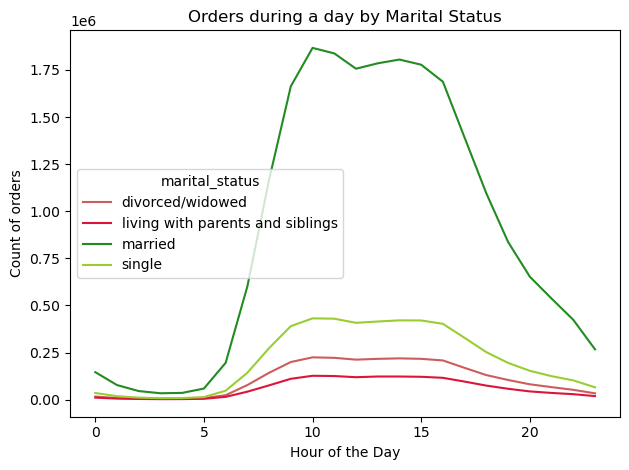

In [36]:
# plotting a graph to display the results of the above crosstab

line_fam_hour = crosstab_fam_hour.plot(kind='line',color=['indianred', 'crimson', 'forestgreen', 'yellowgreen'])
plt.xlabel("Hour of the Day")
plt.ylabel("Count of orders")
plt.title("Orders during a day by Marital Status")
plt.tight_layout()

#### All the groups follow a similar trend, i.e. maximum shopping around 10 am.

In [39]:
# exporting the graph

line_fam_hour.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'fam_hour.png'))

In [18]:
# Aggregating the max, mean, and min variables for the marital status categories 
 
df_fam_agg = df.groupby('marital_status').agg({'prices': ['min', 'max', 'mean']})
df_fam_agg

prices                
                                    min   max      mean
marital_status                                         
divorced/widowed                    1.0  25.0  7.801014
living with parents and siblings    1.0  25.0  7.800604
married                             1.0  25.0  7.790278
single                              1.0  25.0  7.783597

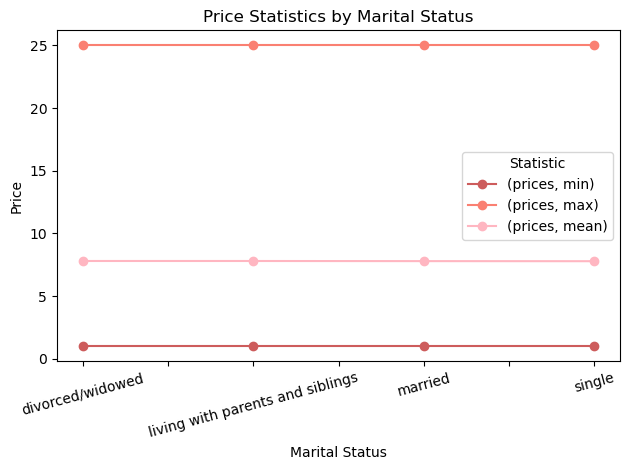

In [30]:
# plotting a graph to convert the above results into a graph

fam_price = df_fam_agg.plot(marker='o', color = ['indianred', 'salmon', 'lightpink'])
plt.title('Price Statistics by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Price')
plt.legend(title='Statistic')
plt.xticks(rotation = 15)
plt.tight_layout()

#### Marital status does not affect the minimum, maximum or the mean of product prices. This means all categories approximately choose similar-priced products.

In [31]:
# exporting the graph

fam_price.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'fam_price.png'))

In [22]:
# Aggregating the max, mean, and min variables for the marital status categories 
 
df_fam_ords_agg = df.groupby('marital_status').agg({'order_frequency': ['min', 'max', 'mean']})
df_fam_ords_agg

order_frequency                
                                             min   max      mean
marital_status                                                  
divorced/widowed                             0.0  30.0  9.874549
living with parents and siblings             0.0  30.0  9.869971
married                                      0.0  30.0  9.970400
single                                       0.0  30.0  9.968773

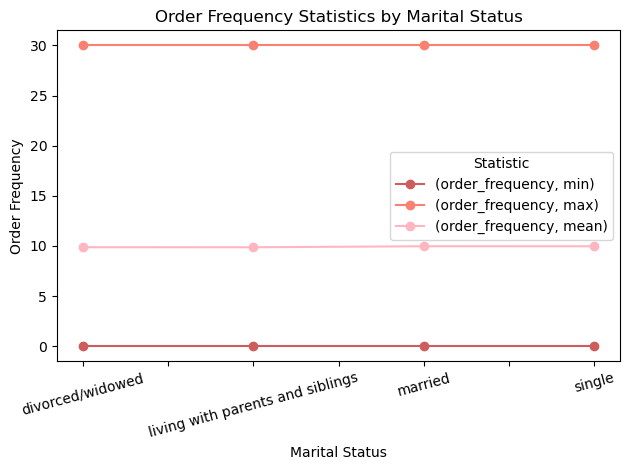

In [28]:
# plotting a graph to display the results of the above aggregation

fam_ord_frequency = df_fam_ords_agg.plot(marker = 'o', color = ['indianred', 'salmon', 'lightpink'])
plt.xlabel('Marital Status')
plt.ylabel('Order Frequency')
plt.legend(title = 'Statistic')
plt.title('Order Frequency Statistics by Marital Status')
plt.xticks(rotation = 15)
plt.tight_layout()

#### Marital status does not influence order frequency as well. 

In [29]:
# exporting the graph

fam_ord_frequency.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'fam_frequency.png'))

## Departments

In [4]:
# importing departments dataset

df_dep = pd.read_csv(os.path.join(path, '2 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [58]:
df_dep.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [5]:
# renaming column 'Unnamed:0' to 'department_id'

df_dep.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [60]:
df_dep.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [6]:
# creating a data dictionary of df_dept

pairing = zip(df_dep['department_id'], df_dep['department'])
data_dict = dict(pairing)
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [7]:
# creating a new column in our dataset to display departments

df['department'] = df['department_id'].map(data_dict)

In [65]:
df.shape

(30964564, 34)

In [66]:
# checking frequency of different departments

df['department'].value_counts(dropna = False)

department
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

#### Produce is the most successful department.

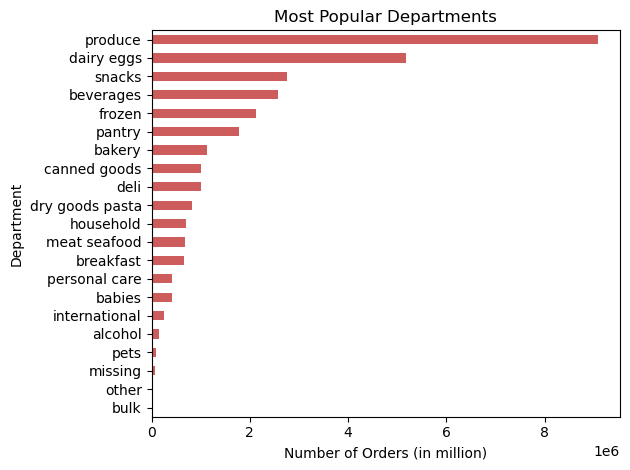

In [68]:
# plotting a graph to compare the popularity of each departments

bar_department = df['department'].value_counts().sort_values().plot.barh(color = 'indianred')
plt.xlabel('Number of Orders (in million)')
plt.ylabel('Department')
plt.title('Most Popular Departments')
plt.tight_layout()

In [69]:
# exporting this graph

bar_department.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'popular_depts.png'))

#### The most popular departments are the obvious household essential items like produce, dairy eggs, snacks & beverages. Instacart should focus on creating lucrative deals on the popular department items to attract new customers and market non-performing products for frequent  customers.

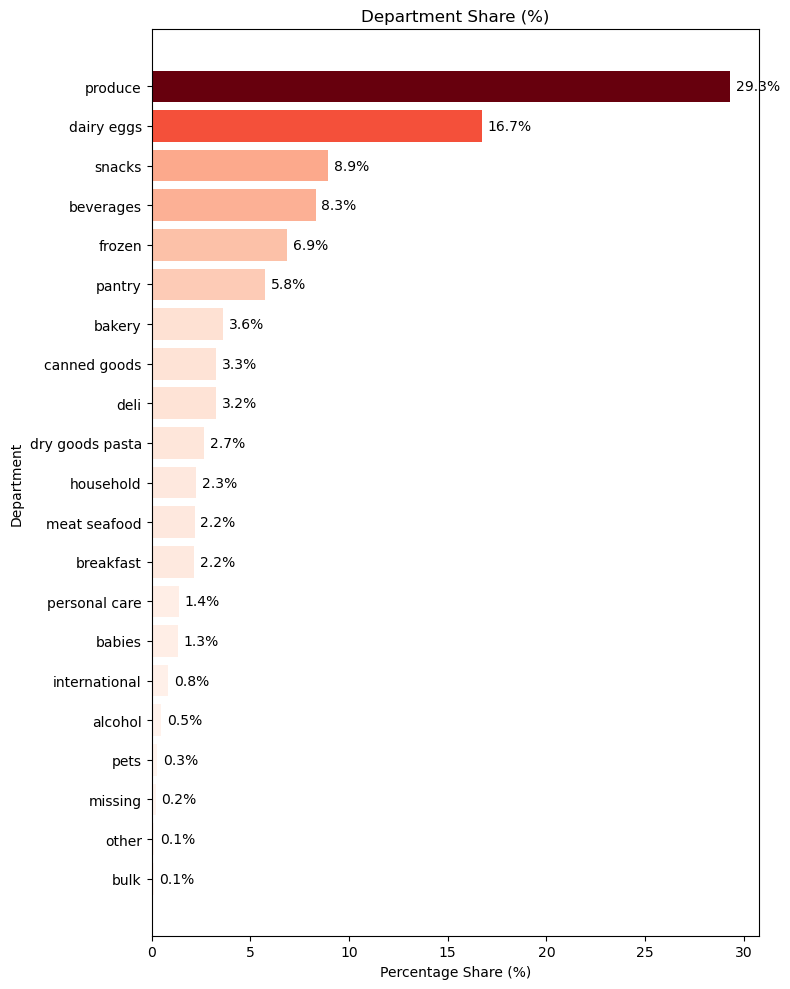

In [21]:
# plotting a graph to display % share of each department

dept_pct = (df['department'].value_counts(normalize=True).mul(100).sort_values())

dep_share = plt.figure(figsize=(8, 10))
bars = plt.barh(
    dept_pct.index,
    dept_pct.values,
    color=plt.cm.Reds(dept_pct.values / dept_pct.values.max())
)

plt.xlabel('Percentage Share (%)')
plt.ylabel('Department')
plt.title('Department Share (%)')

# Add percentage labels
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.3,
        bar.get_y() + bar.get_height() / 2,
        f'{width:.1f}%',
        va='center'
    )

plt.tight_layout()

In [22]:
# exporting this graph

dep_share.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'dep_share.png'))

In [11]:
# creating a crosstab between departments and age_category to see if there is any pattern

crosstab_dep_age = pd.crosstab(df['department'], df['age_category'], dropna = False)
crosstab_dep_age

age_category,Middle-Aged,Senior,Young Adults
department,,,
alcohol,71736,34691,38200
babies,208921,100162,101309
bakery,561064,278458,281306
beverages,1288466,646414,637021
breakfast,335412,165491,169947
bulk,16637,8336,8478
canned goods,505082,251940,255052
dairy eggs,2580158,1291039,1305985
deli,502265,250463,251106


In [12]:
crosstab_dep_age.to_clipboard()

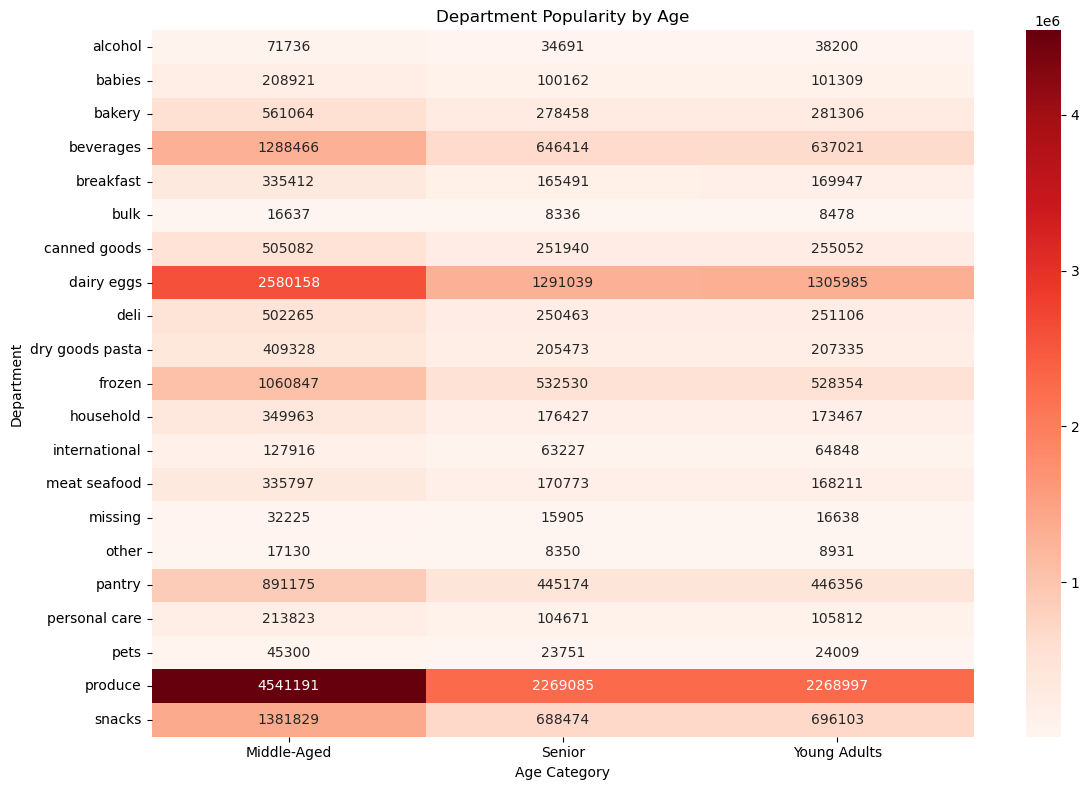

In [13]:
# plotting a heatmap for crosstab_dep_age

heatmap_dep_age = plt.figure(figsize=(12, 8))
sns.heatmap(crosstab_dep_age,
            annot=True,        # show values in cells
            fmt='d',            # integer format; 'd' for counts
            cmap='Reds')
plt.xlabel("Age Category")
plt.ylabel("Department")
plt.title("Department Popularity by Age")
plt.tight_layout()

In [14]:
# exporting this graph 

heatmap_dep_age.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'dep_age.png'))

In [25]:
# creating a crosstab between departments and marital_status to see if there is any pattern

crosstab_dep_marital = pd.crosstab(df['department'], df['marital_status'], dropna = False)
crosstab_dep_marital

marital_status,divorced/widowed,living with parents and siblings,married,single
department,,,,
alcohol,11859,8379,99421,24968
babies,34351,19381,287683,68977
bakery,95735,53684,785749,185660
beverages,220879,119107,1807453,424462
breakfast,56590,33198,471220,109842
bulk,2676,1633,23818,5324
canned goods,84268,48477,712577,166752
dairy eggs,442602,250207,3632599,851774
deli,86749,48119,702333,166633


In [26]:
crosstab_dep_marital.to_clipboard()

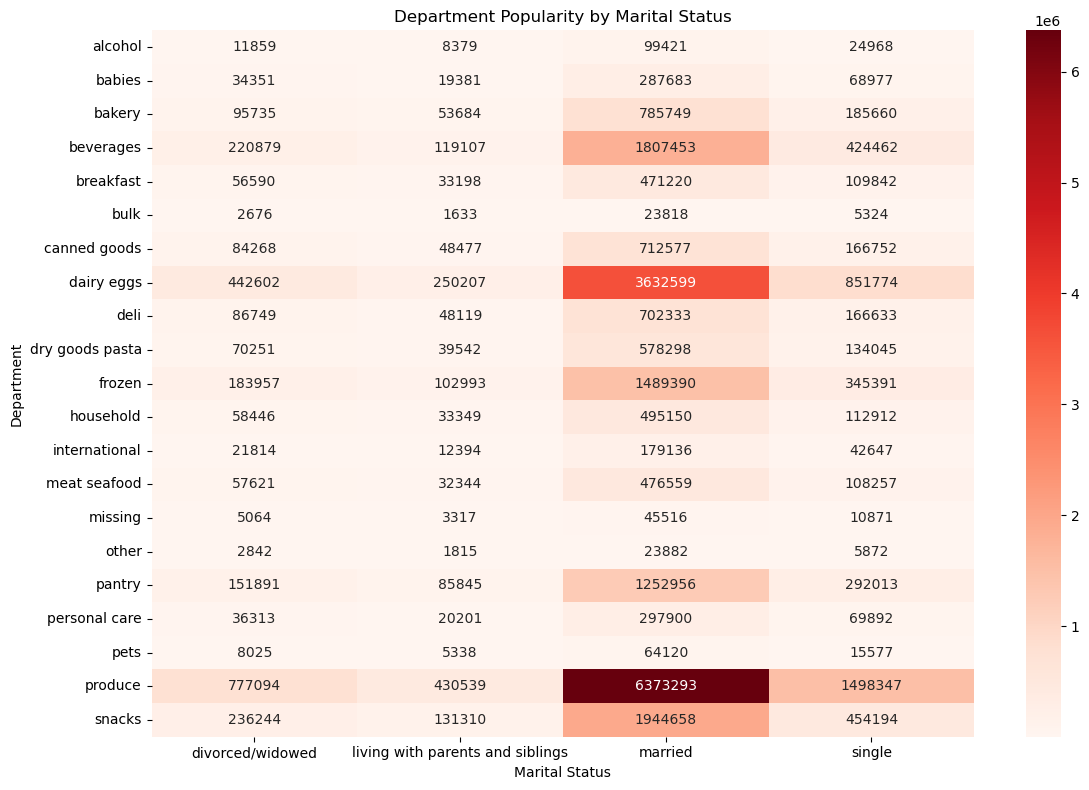

In [12]:
# plotting a heatmap for crosstab_dep_marital

heatmap = plt.figure(figsize=(12, 8))
sns.heatmap(crosstab_dep_marital,
            annot=True,        # show values in cells
            fmt='d',            # integer format; 'd' for counts
            cmap='Reds')
plt.xlabel("Marital Status")
plt.ylabel("Department")
plt.title("Department Popularity by Marital Status")
plt.tight_layout()

#### All the categories of users follow the same trend when it comes to departments. 

In [79]:
# exporting graph

heatmap.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'dept_marital_status.png'))

In [23]:
# creating a crosstab between departments and region to see if there is any pattern

crosstab_dep_region = pd.crosstab(df['department'], df['region'], dropna = False)
crosstab_dep_region

region,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1212490,914616,1723016,1327060
deli,234464,178398,333620,257352


In [24]:
crosstab_dep_region.to_clipboard()

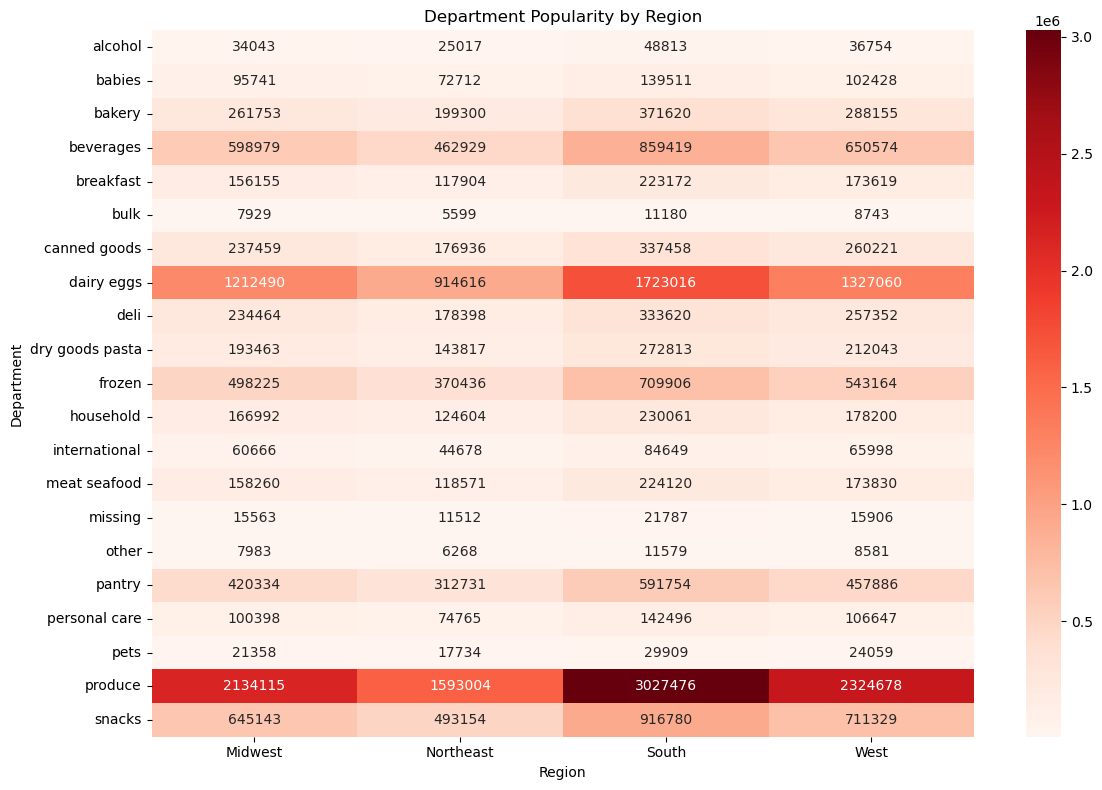

In [14]:
# plotting a heatmap for crosstab_dep_region

heatmap1 = plt.figure(figsize=(12, 8))
sns.heatmap(crosstab_dep_region,
            annot=True,        # show values in cells
            fmt='d',            # integer format; 'd' for counts
            cmap='Reds')
plt.xlabel("Region")
plt.ylabel("Department")
plt.title("Department Popularity by Region")
plt.tight_layout()

#### The above heatmap shows that the departments have similar popularity across different region with the South region coming at the top. The top departments for all regions are produce, dairy eggs, snacks and beverages.

In [15]:
# exporting this graph
heatmap1.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'dept_region.png'))

In [20]:
# Crosstab of age and marital status. 

crosstab_age_marital_status = pd.crosstab(df['marital_status'], df['age_category'], dropna = False)
crosstab_age_marital_status

age_category,Middle-Aged,Senior,Young Adults
marital_status,,,
divorced/widowed,739550,1905721,0
living with parents and siblings,0,0,1481172
married,11582004,5825113,4336594
single,3154711,0,1939699


In [21]:
crosstab_age_marital_status.to_clipboard()

In [22]:
# crosstab of age & number of dependents

crosstab_age_dependants = pd.crosstab(df['age_category'], df['number_of_dependants'], dropna = False)
crosstab_age_dependants

number_of_dependants,0,1,2,3
age_category,,,,
Middle-Aged,3894261,3872145,3827873,3881986
Senior,1905721,1916639,1966696,1941778
Young Adults,1939699,1930322,1938692,1948752


In [37]:
# Remove extra spaces and unify capitalization

df['age_category'] = df['age_category'].str.strip().str.title()
df['marital_status'] = df['marital_status'].str.strip().str.lower()

In [38]:
dependant_mask = (
    (df['age_category'] == 'Young Adults') &
    (df['marital_status'] == 'living with parents and siblings')
)

In [39]:
dependant_mask.sum()

np.int64(1481172)

In [13]:
# creating a new column to display a custom customer profile

conditions = [
    ((df['age_category'] == 'Young Adults') &
    ((df['marital_status'] == 'single') | (df['marital_status'] == 'divorced/widowed')) &
    (df['number_of_dependants'] == 0)),

    ((df['age_category'] == 'Young Adults') &
    (df['marital_status'] == 'married') &
    (df['number_of_dependants'] >= 1)),

    ((df['age_category'] == 'Middle-Aged') &
    ((df['marital_status'] == 'single') | (df['marital_status'] == 'divorced/widowed')) &
    (df['number_of_dependants'] == 0)),

    ((df['age_category'] == 'Middle-Aged') &
    (df['marital_status'] == 'married') &
    (df['number_of_dependants'] >= 1)),

    (((df['age_category'] == 'Young Adults') | (df['age_category'] == 'Middle-Aged')) &
    (df['marital_status'] == 'divorced/widowed') &
    (df['number_of_dependants'] >= 1)),

    ((df['age_category'].str.strip().str.title() == 'Young Adults') &
    (df['marital_status'].str.strip().str.lower() == 'living with parents and siblings')),

    ((df['age_category'] == 'Senior') &
    (df['marital_status'] == 'divorced/widowed') &
    (df['number_of_dependants'] == 0)),

    ((df['age_category'] == 'Senior')&
    ((df['marital_status'] == 'married') | (df['marital_status'] == 'divorced/widowed')) &
    (df['number_of_dependants'] >= 1)),
]

choices = [
    'Young Single',
    'Young Family',
    'Middle Aged Single',
    'Middle Aged Family',
    'Single Parent',
    'Dependant',
    'Single Senior',
    'Senior Family'
]

df['customer_profile'] = np.select(conditions, choices, default='Other')

In [24]:
# checking the creation of the column

df.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'marital_status', 'income', 'product_id',
       'product_name', 'department_id', 'prices', 'order_id', 'order_number',
       'orders_day_of_the_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', 'price_range', 'busiest_day',
       'busiest_hours', 'max_order', 'loyalty_flag', 'average_spent',
       'spending_flag', 'order_frequency', 'order_frequency_flag', '_merge',
       'region', 'activity_flag', 'age_category', 'income_flag', 'department',
       'customer_profile'],
      dtype='object')

In [14]:
# checking frequency for customer_profile column

df['customer_profile'].value_counts(dropna = False)

customer_profile
Middle Aged Family    11582004
Senior Family          5825113
Young Family           4336594
Middle Aged Single     3894261
Young Single           1939699
Single Senior          1905721
Dependant              1481172
Name: count, dtype: int64

In [16]:
df.shape

(30964564, 35)

In [17]:
# change data type of customer_profile to category to save memory

df['customer_profile'] = df['customer_profile'].astype('category')

In [18]:
# export this dataset

df.to_parquet(os.path.join(path, '2 Data', 'Prepared Data', 'cust_ords_prods_high_activity_latest.parquet'))

In [2]:
# importing the latest data

path = '/Users/tannu/Desktop/Data Analytics/Instacart Basket Analysis Dec-2025 '
df = pd.read_parquet(os.path.join(path, '2 Data', 'Prepared Data', 'cust_ords_prods_high_activity_latest.parquet'))

In [3]:
df.shape

(30964564, 35)

In [4]:
df.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'marital_status', 'income', 'product_id',
       'product_name', 'department_id', 'prices', 'order_id', 'order_number',
       'orders_day_of_the_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', 'price_range', 'busiest_day',
       'busiest_hours', 'max_order', 'loyalty_flag', 'average_spent',
       'spending_flag', 'order_frequency', 'order_frequency_flag', '_merge',
       'region', 'activity_flag', 'age_category', 'income_flag', 'department',
       'customer_profile'],
      dtype='object')

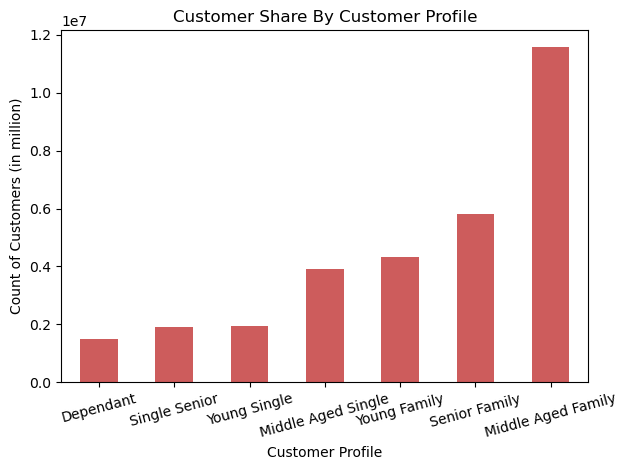

In [9]:
# Plotting a graph to see customer share of different customer profiles in the instacart app

cust_share = df['customer_profile'].value_counts().sort_values().plot.bar(color = 'indianred')
plt.xlabel('Customer Profile')
plt.ylabel('Count of Customers (in million)')
plt.title('Customer Share By Customer Profile')
plt.xticks(rotation = 15)
plt.tight_layout()

In [10]:
# expoting the graph

cust_share.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'cust_share.png'))

In [9]:
# Aggregating the max, mean, and min for the price variable for the customer profile categories 

df_cust_price = df.groupby('customer_profile').agg({'prices': ['min', 'max', 'mean']})
df_cust_price

/var/folders/z8/12vdbzn57fx_ky9_g3vm3lv80000gn/T/ipykernel_74707/4058620857.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cust_price = df.groupby('customer_profile').agg({'prices': ['min', 'max', 'mean']})


prices                
                      min   max      mean
customer_profile                         
Dependant             1.0  25.0  7.800604
Middle Aged Family    1.0  25.0  7.792837
Middle Aged Single    1.0  25.0  7.788449
Senior Family         1.0  25.0  7.791746
Single Senior         1.0  25.0  7.802276
Young Family          1.0  25.0  7.781473
Young Single          1.0  25.0  7.779257

Text(0.5, 1.0, 'Price Frequency by Customer Profile')

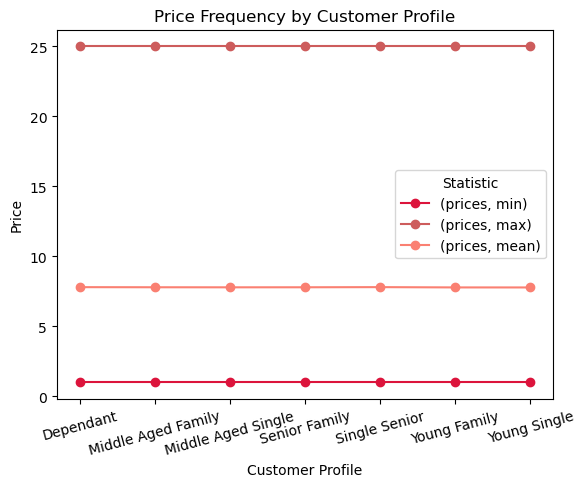

In [10]:
# plotting a graph to visualize the above results

cust_prices = df_cust_price.plot(marker = 'o', color = ['crimson', 'indianred', 'salmon'])
plt.xlabel('Customer Profile')
plt.ylabel('Price')
plt.xticks(rotation = 15)
plt.legend(title = 'Statistic')
plt.title('Price Frequency by Customer Profile')

#### This means that people in different phases of life are not spending very differently on the Instacart app.

In [11]:
# exporting the graph

cust_prices.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'cust_price.png'))

In [4]:
# Aggregating the max, mean, and min for the order frequency variable for the customer profile categories 

df_cust_fre = df.groupby('customer_profile').agg({'order_frequency': ['min', 'max', 'mean']})
df_cust_fre

/var/folders/z8/12vdbzn57fx_ky9_g3vm3lv80000gn/T/ipykernel_74707/1413145242.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cust_fre = df.groupby('customer_profile').agg({'order_frequency': ['min', 'max', 'mean']})


order_frequency                 
                               min   max       mean
customer_profile                                   
Dependant                      0.0  30.0   9.869971
Middle Aged Family             0.0  30.0   9.979476
Middle Aged Single             0.0  30.0   9.894609
Senior Family                  0.0  30.0   9.944680
Single Senior                  0.0  30.0   9.916697
Young Family                   0.0  30.0   9.980708
Young Single                   0.0  30.0  10.040333

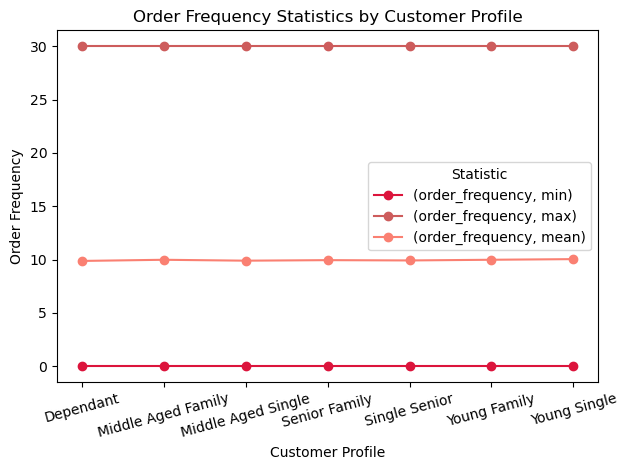

In [6]:
# plotting a graph to display the above results

cust_frequency = df_cust_fre.plot(marker = 'o', color = ['crimson', 'indianred', 'salmon'])
plt.xlabel('Customer Profile')
plt.ylabel('Order Frequency')
plt.legend(title = 'Statistic')
plt.title('Order Frequency Statistics by Customer Profile')
plt.xticks(rotation = 15)
plt.tight_layout()

#### There isn't any difference in the order frequency based on a customer's profile. 

In [8]:
# exporting the above graph

cust_frequency.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'cust_frequency.png'))

In [15]:
# creating a crosstab between customer profile & department

crosstab_profile_dep = pd.crosstab(df['customer_profile'], df['department'], dropna = False)
crosstab_profile_dep_pct = (crosstab_profile_dep.div(crosstab_profile_dep.sum(axis=1), axis=0) * 100)
crosstab_profile_dep_pct

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
customer_profile,,,,,,,,,,,,,,,,,,,,,
Dependant,0.565701,1.308491,3.624427,8.041402,2.241333,0.110251,3.272881,16.892501,3.248711,2.669643,...,2.251528,0.836770,2.183676,0.223944,0.122538,5.795748,1.363852,0.360390,29.067455,8.865277
Middle Aged Family,0.455051,1.349378,3.616775,8.304012,2.161422,0.109040,3.265652,16.656081,3.229579,2.656129,...,2.285131,0.825643,2.180598,0.209731,0.108712,5.772049,1.391072,0.295173,29.336029,8.929966
Middle Aged Single,0.488719,1.351630,3.650731,8.389140,2.184651,0.102921,3.257460,16.718191,3.292409,2.611407,...,2.190377,0.829169,2.137504,0.203736,0.116556,5.717542,1.353505,0.285369,29.363492,8.924928
Senior Family,0.447081,1.303649,3.610728,8.372593,2.164078,0.109749,3.283816,16.688466,3.238323,2.661717,...,2.301157,0.817941,2.215734,0.209163,0.109028,5.768832,1.341845,0.298174,29.300822,8.900600
Single Senior,0.453792,1.271067,3.574972,8.327609,2.069086,0.101956,3.182732,16.734716,3.244284,2.645980,...,2.223935,0.817591,2.188358,0.195254,0.104895,5.726599,1.390917,0.334886,29.504791,8.920718
Young Family,0.476734,1.278861,3.609399,8.254612,2.186601,0.110594,3.298971,16.865056,3.220200,2.666078,...,2.223888,0.827008,2.189114,0.208482,0.113914,5.727905,1.351798,0.289720,29.257685,9.037484
Young Single,0.471568,1.364593,3.665363,8.245867,2.161418,0.105635,3.274322,16.724708,3.265455,2.689902,...,2.251741,0.855287,2.110327,0.220653,0.112182,5.780021,1.391401,0.314843,29.369041,8.912414


In [21]:
crosstab_profile_dep_pct.to_clipboard()

#### We cannot gauge much by this crosstab, so we'll plot a stacked bar chart to visualize our results.

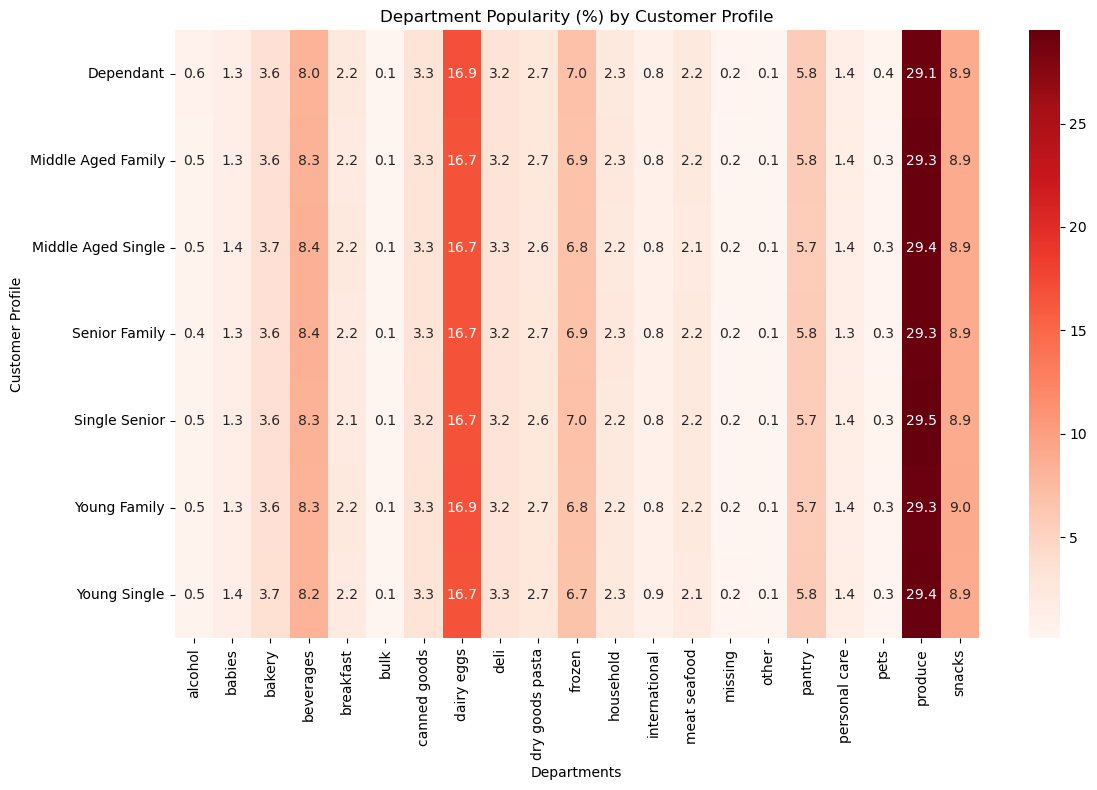

In [19]:
# plotting a heatmap

heatmap_profile_dep = plt.figure(figsize=(12, 8))
sns.heatmap(crosstab_profile_dep_pct,
            annot=True,        
            fmt='.1f',           
            cmap='Reds')
plt.xlabel("Departments")
plt.ylabel("Customer Profile")
plt.title("Department Popularity (%) by Customer Profile")
plt.tight_layout()

#### All the different customer profiles show similar buying trends. This means the marketing team should advertise unpopular categories with lucrative offers to increase the overall order size of the customer because all groups of people already rely on their essential shopping from the Instacart app. 

In [20]:
# exporting this heatmap

heatmap_profile_dep.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'heatmap_profile_dept.png'))

## Loyalty 

In [6]:
# Aggregating the max, mean, and min for price variable for the loyalty categories 
 
df.groupby('loyalty_flag').agg({'prices': ['min', 'max', 'mean']})

prices                
                    min   max      mean
loyalty_flag                           
Loyal Customer      1.0  25.0  7.773575
New Customer        1.0  25.0  7.801665
Regular Customer    1.0  25.0  7.798262

Text(0.5, 1.0, 'Prices by Loyalty Category')

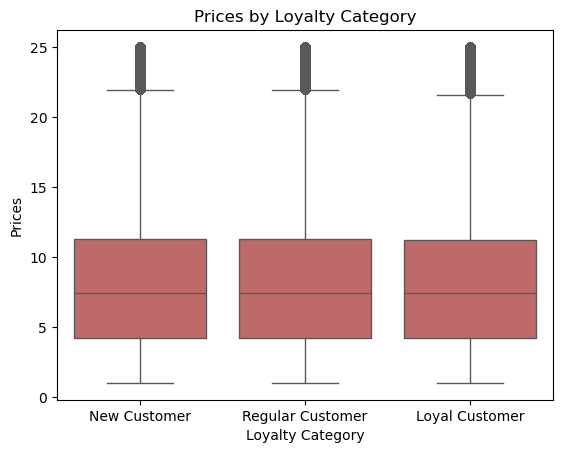

In [16]:
# plotting a boxplot to display the relationship between loyalty & prices

boxplot_1 = plt.figure()
sns.boxplot(
    data=df,
    x='loyalty_flag',
    y='prices',
    color = 'indianred'
)
plt.xlabel('Loyalty Category')
plt.ylabel('Prices')
plt.title('Prices by Loyalty Category')

In [17]:
# exporting the graph

boxplot_1.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'price_loyalty.png'))

In [8]:
# Aggregating the max, mean, and min for order frequency variable for the loyalty categories

df.groupby('loyalty_flag').agg({'order_frequency': ['min', 'max', 'mean']})

order_frequency                 
                             min   max       mean
loyalty_flag                                     
Loyal Customer               0.0  14.0   5.170559
New Customer                 0.0  30.0  18.037059
Regular Customer             0.0  30.0  10.612951

#### The above two aggregations tell us that loyalty does not affect the amount of money spent on the app, but their order frequency is definitely affected by the loyalty of the customer. Loyal customers tend to order more frequently than Regular and New Customers.

Text(0.5, 1.0, 'Order Frequency by Loyalty Category')

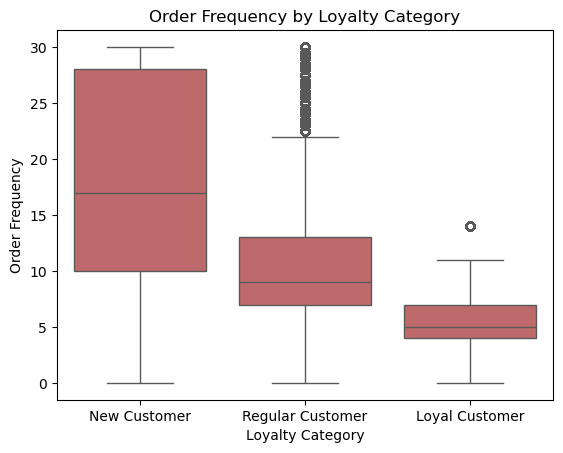

In [28]:
# plotting a boxplot to display the relationship between loyalty & order frequency

boxplot = plt.figure()
sns.boxplot(
    data=df,
    x='loyalty_flag',
    y='order_frequency',
    color = 'indianred'
)
plt.xlabel('Loyalty Category')
plt.ylabel('Order Frequency')
plt.title('Order Frequency by Loyalty Category')

#### Through the above visualization it is clear that loyal customers tend to order more frequently from regular and new customers. 

In [29]:
# exporting this graph

boxplot.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'loyalty_frequency.png'))

## Price-Range

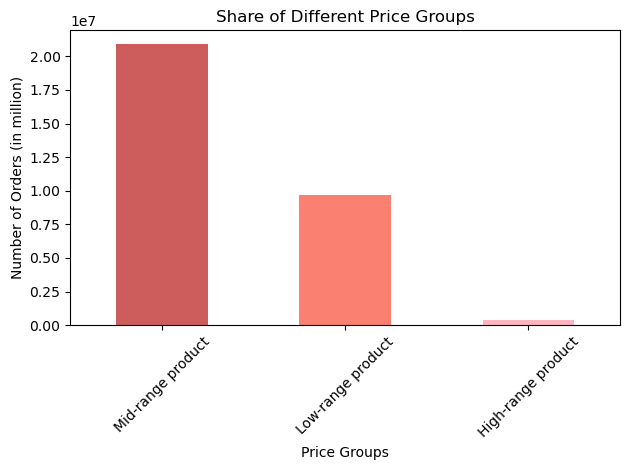

In [35]:
# plotting a chart to display different price ranges

price_range = df['price_range'].value_counts().plot.bar(color = ['indianred', 'salmon', 'lightpink'])
plt.xlabel('Price Groups')
plt.ylabel('Number of Orders (in million)')
plt.title('Share of Different Price Groups')
plt.xticks(rotation=45)
plt.tight_layout()

In [36]:
# exporting this graph

price_range.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'price_groups.png'))

## Products

In [12]:
# subset of 10 top products

df_top_10 = df['product_name'].value_counts().head(10)

In [13]:
df_top_10

product_name
Banana                    453164
Bag of Organic Bananas    366403
Organic Strawberries      255988
Organic Baby Spinach      231772
Organic Hass Avocado      206799
Organic Avocado           168267
Large Lemon               145397
Strawberries              136330
Limes                     134751
Organic Whole Milk        133514
Name: count, dtype: int64

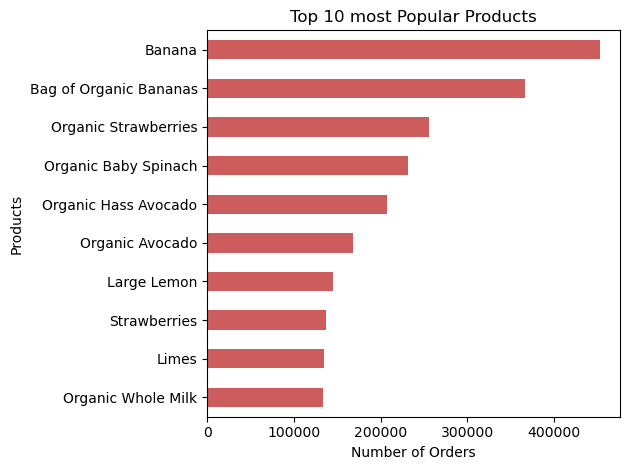

In [14]:
# plotting a graph of top 10 products

top_10 = df_top_10.sort_values().plot(kind = 'barh', color = 'indianred')
plt.xlabel('Number of Orders')
plt.ylabel('Products')
plt.title('Top 10 most Popular Products')
plt.tight_layout()

In [15]:
# exporting the picture

top_10.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'top_10.png'))